In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_pancan=pd.read_csv('pancan.csv')

In [3]:
df_pancan.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df_pancan.columns

Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20521', 'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525',
       'gene_20526', 'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530'],
      dtype='object', length=20531)

In [9]:
import swifter

# Performing EDA on Dataset

In [7]:
df1=pd.DataFrame(df_pancan.isna().sum())
df1=df1.reset_index()
df1.columns=['Column_Names','Count_of_Nan_Values']
df2=df1[df1['Count_of_Nan_Values']!=0].sort_values(by=['Count_of_Nan_Values'],ascending=False)
df2['Percentage_of_NAN']=df2['Count_of_Nan_Values']/len(df_pancan)*100
print('The Nan Value columns with percentage are as follows')
print(df2)

The Nan Value columns with percentage are as follows
Empty DataFrame
Columns: [Column_Names, Count_of_Nan_Values, Percentage_of_NAN]
Index: []


In [8]:
df_pancan.shape

(801, 20531)

# Performing Feature Engineering on Dataset

In [65]:
df_pancan.shape

(801, 20531)

In [37]:
df_sample.head(10)

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_2990,gene_2991,gene_2992,gene_2993,gene_2994,gene_2995,gene_2996,gene_2997,gene_2998,gene_2999
0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.000000,0.591871,...,9.915684,9.053885,6.890690,3.188164,0.000000,7.070196,8.268364,8.455072,8.154854,0.000000
1,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.000000,0.000000,...,9.523584,8.877576,9.226111,0.811142,0.000000,10.018242,10.229143,9.673654,11.738924,5.601049
2,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.000000,0.000000,...,9.221672,9.135927,7.459718,0.000000,0.000000,5.014445,5.094422,10.153438,8.683465,0.452595
3,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.000000,0.000000,...,9.122766,8.997450,7.798491,1.039419,1.039419,5.640933,9.745358,9.477092,8.159619,0.000000
4,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.000000,0.000000,...,9.648584,10.751527,5.983124,0.889707,8.068778,8.735630,10.255642,9.773836,9.482560,0.000000
5,3.467853,3.581918,6.620243,9.706829,0.0,7.758510,0.000000,0.0,0.000000,0.515410,...,9.548456,9.585492,6.759449,3.384893,0.000000,7.139285,9.457418,8.571988,9.428942,0.000000
6,1.224966,1.691177,6.572007,9.640511,0.0,6.754888,0.531868,0.0,0.000000,3.173927,...,10.981888,9.469601,9.122564,2.764643,0.000000,8.183839,9.887982,9.055242,9.809876,1.476796
7,2.854853,1.750478,7.226720,9.758691,0.0,5.952103,0.000000,0.0,0.000000,0.441802,...,10.078738,9.753910,6.678030,2.405856,0.000000,7.208488,8.910238,8.742966,9.442390,0.441802
8,3.992125,2.772730,6.546692,10.488252,0.0,7.690222,0.352307,0.0,4.067604,1.411318,...,9.309833,11.800819,7.015181,1.074848,5.107336,8.920475,11.254468,10.153603,9.088968,1.554049
9,3.642494,4.423558,6.849511,9.464466,0.0,7.947216,0.724214,0.0,0.000000,0.000000,...,9.573742,9.873320,5.714457,1.204141,0.000000,5.229273,9.165171,8.857726,8.699295,0.000000


We remove variables with low variance before performing PCA because they do not contribute significantly to the overall variability of the dataset. Variables with low variance are usually not informative and can even introduce noise in the analysis.

PCA aims to identify the most significant variables that explain the largest amount of variation in the dataset. By removing variables with low variance, we can focus on the variables that contribute most to the overall variability of the dataset and improve the effectiveness of the PCA analysis.

In addition, removing low variance variables can also help reduce the dimensionality of the dataset, which can improve the efficiency of subsequent analyses and reduce computational resources

In [9]:
#Scaling the Dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_dataframe_scaled =pd.DataFrame(scaler.fit_transform(df_pancan))

In [10]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
variance_filtered = selector.fit_transform(input_dataframe_scaled)
variance_filtered=pd.DataFrame(variance_filtered)

# Performing PCA

In [53]:
df_sample=df_pancan.copy()
df_sample=df_pancan.head(10)


In [86]:
list_of_columns=[str('gene_'+str(i)) for i in range(1,300)]
df_sample=df_pancan[list_of_columns]

df_sample.shape

(801, 299)

In [87]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

def covariance(input_dataframe):
    '''
    This function takse input as a standardized dataframe
    '''
    input_dataframe_mean = input_dataframe.swifter.apply(np.mean, axis=0)
    input_dataframe_centered= input_dataframe-input_dataframe_mean
    with tqdm(total=input_dataframe.shape[1], desc="Calculating Covariance Matrix") as pbar:
        cov_matrix=np.cov(input_dataframe.T)
        pbar.update()
    return cov_matrix,input_dataframe_centered

def principal_component_analysis(input_dataframe):
    '''
    This function takes input_dataframe,stadndardizes it and number of components as the number of components required by PC
    '''
    scaler = StandardScaler()
    input_dataframe_scaled =pd.DataFrame(scaler.fit_transform(input_dataframe))
    #Calling the covriance function
    covariance_matrix,input_dataframe_centered=covariance(input_dataframe_scaled)
    #Calculates Covariance Matirx
    eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)
    #Calculates Eigen Values and Eigen Vectors
    sorted_indices=np.argsort(eigen_values)
    #Sort the elements in descending order
    sorted_indices=sorted_indices[::-1]
    
    
    explained_variances = eigen_values / np.sum(eigen_values)
    
    variance_explained_ratios = pd.DataFrame(explained_variances[sorted_indices], columns=["variance_explained_ratio"])
    variance_explained_ratios["cumulative_variance_explained_ratio"] = variance_explained_ratios["variance_explained_ratio"].cumsum()
    
    #Find the number of components that explain 90% of variance
    number_of_components = variance_explained_ratios["cumulative_variance_explained_ratio"][variance_explained_ratios["cumulative_variance_explained_ratio"] <= 0.90].count() + 1
    
    print("Number of Principal components explain 90% of variance are {}".format(number_of_components))
    
    
    
    
    #Taking Top Eigen Values and Top Eigen Vectors
    top_eigen_values_indices=sorted_indices[:number_of_components]
    top_eigen_vectors=eigen_vectors[:,top_eigen_values_indices]
    
     #Variance Calculations Plot
    explained_variances = eigen_values/np.sum(eigen_values)
    variance_explained = pd.DataFrame(eigen_values[top_eigen_values_indices] / sum(eigen_values))
    variance_explained['PC_Feature']=top_eigen_values_indices
    variance_explained_plot=pd.Series(eigen_values[top_eigen_values_indices] / sum(eigen_values))
    
    
    #Cumulative Variance Plot
    cumulative_variance_explained = np.cumsum(variance_explained_plot)
    cumulative_variance_explained_plot = pd.Series(cumulative_variance_explained)
    
    
    
    #Projecting Principal Components 
    principal_components=input_dataframe_centered.dot(top_eigen_vectors)
    principal_components.columns=[f'PC{i+1}' for i in range(number_of_components)]
    
    
   
    
    #Calculate the loadings
    loadings = pd.DataFrame(top_eigen_vectors,index=input_dataframe.columns)
    
    df_principal_components=pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(number_of_components)])
    #PLotting the graph 
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ax[0].plot(np.arange(1, number_of_components+1),variance_explained_plot, 'o-')
    ax[0].set_xlabel('Principal Component')
    ax[0].set_ylabel('Proportion of Variance Explained')
    ax[0].set_title('Scree Plot')
    
    
    ax[1].plot(np.arange(1, number_of_components+1),cumulative_variance_explained_plot, 'o-')
    ax[1].set_xlabel('Principal Component')
    ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
    ax[1].set_title('Cumulative Scree Plot')
    plt.tight_layout()
    plt.show()
    
    #Correlation between PC1 and PC2
    
    plt.scatter(principal_components['PC1'], principal_components['PC2'])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Scatter plot of PC1 against PC2')
    plt.show()
    
    principal_components_temp=principal_components[['PC1','PC2']]
    corr_matrix = principal_components_temp.corr()
    print('Correlation matrix:')
    print(corr_matrix)
    
    total_variance_explained=cumulative_variance_explained_plot[1]
    print("The total variance explained by first two PC's is {}".format(total_variance_explained))

    return variance_explained,loadings,principal_components,cumulative_variance_explained
    
    
    
    



Calculating Covariance Matrix:   0%|          | 1/20531 [00:16<93:08:30, 16.33s/it]


Number of Principal components explain 90% of variance are 373


/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


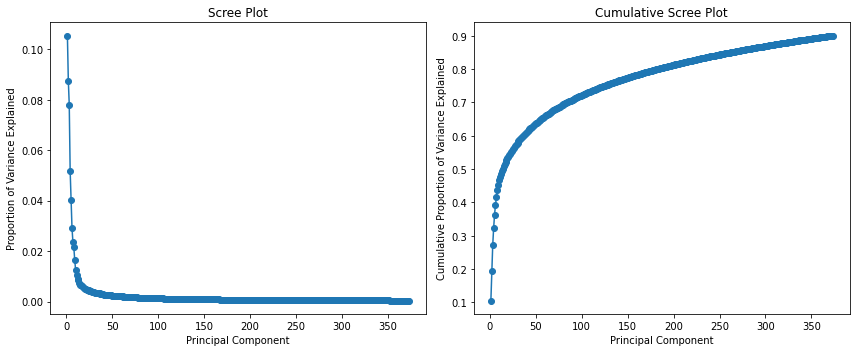

/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


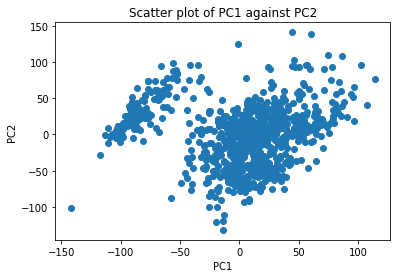

/N/u/javshah/Carbonate/.local/lib/python3.9/site-packages/pandas/core/internals/managers.py:1768: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = arr.astype(dtype, copy=False)


Correlation matrix:
              PC1           PC2
PC1  1.000000e+00 -1.923637e-15
PC2 -1.923637e-15  1.000000e+00
The total variance explained by first two PC's is (0.1929401381992425+0j)


In [101]:
variance_explained,loadings,principal_components,cumulative_variance_explained=principal_component_analysis(df_pancan)

In [102]:
variance_explained.to_csv('variance_explained_full_10.csv')
loadings.to_csv('loadings_full_10.csv')
principal_components.to_csv('principal_components_full_10.csv')

# Method 2 When cumulative Variance Reaches 75 percent

In [108]:
variance_explained_method=variance_explained.copy()
variance_explained_method['cumulative_variance']=variance_explained[0].cumsum()
variance_explained_method['cumulative_variance']=variance_explained_method['cumulative_variance'].swifter.apply(lambda x:x.real)

In [116]:
def variance_method(cumulative_variance_dataframe,threshold):
    '''
    Input requires a dataframe having cumulative variance and a threshold
    Threshold values must be between 0.70-0.95
    '''
    return threshold,len(variance_explained_method[variance_explained_method['cumulative_variance']<=threshold])

In [117]:
threshold=[0.70,0.72,0.75,0.78,0.80,0.82,0.85,0.88,0.90]
pc_dict={}
for i in threshold:
    threshold,number_of_pcs=variance_method(variance_explained_method,i)
    pc_dict[threshold]=number_of_pcs
pc_dict

{0.7: 84,
 0.72: 98,
 0.75: 124,
 0.78: 157,
 0.8: 182,
 0.82: 211,
 0.85: 261,
 0.88: 323,
 0.9: 372}

# Method 3 Using components whose variance is atleast 1


In [122]:
from sklearn.preprocessing import StandardScaler
input_dataframe=df_pancan
scaler = StandardScaler()
input_dataframe_scaled =pd.DataFrame(scaler.fit_transform(input_dataframe))
covariance_matrix,input_dataframe_centered=covariance(input_dataframe_scaled)
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)

Calculating Covariance Matrix:   0%|          | 1/20531 [00:16<95:25:46, 16.73s/it]


In [133]:
eigen_values_greater=[x for x in eigen_values if x.real>1]
print("The number of Principal Components having variance greater than 1 is {}".format(len(eigen_values_greater)))


The number of Principal Components having variance greater than 1 is 800


# Discussion about Loadings

In [140]:
loadings_real=loadings.applymap(lambda x:x.real)

In [184]:
loadings_list=[]
for col in loadings_real.columns:
    indices=[]
    indices_positive=loadings_real.index[loadings_real[col] > 0.04].tolist()
    indices_negative=loadings_real.index[loadings_real[col] <-0.04].tolist()
    indices=indices_positive+indices_negative
    loadings_list.append(['PC'+str(col),indices])
loadings_list

[['PC0', []],
 ['PC1', []],
 ['PC2', []],
 ['PC3', []],
 ['PC4', []],
 ['PC5', []],
 ['PC6', []],
 ['PC7', []],
 ['PC8', []],
 ['PC9', []],
 ['PC10', []],
 ['PC11', []],
 ['PC12', []],
 ['PC13', []],
 ['PC14', []],
 ['PC15', []],
 ['PC16', ['gene_18698']],
 ['PC17', []],
 ['PC18', []],
 ['PC19', []],
 ['PC20', []],
 ['PC21', ['gene_16961']],
 ['PC22', ['gene_19867']],
 ['PC23', []],
 ['PC24', []],
 ['PC25', []],
 ['PC26', []],
 ['PC27', []],
 ['PC28', []],
 ['PC29', []],
 ['PC30', []],
 ['PC31', []],
 ['PC32', []],
 ['PC33', []],
 ['PC34', []],
 ['PC35', []],
 ['PC36', []],
 ['PC37', []],
 ['PC38', []],
 ['PC39', []],
 ['PC40', []],
 ['PC41', []],
 ['PC42', []],
 ['PC43', []],
 ['PC44', []],
 ['PC45', []],
 ['PC46', []],
 ['PC47', []],
 ['PC48', []],
 ['PC49', []],
 ['PC50', []],
 ['PC51', []],
 ['PC52', ['gene_12879']],
 ['PC53', []],
 ['PC54', []],
 ['PC55', []],
 ['PC56', []],
 ['PC57', []],
 ['PC58', []],
 ['PC59', ['gene_4343']],
 ['PC60', []],
 ['PC61', []],
 ['PC62',
  ['gene_15

# Checking for the Genes that affect variance the maximum

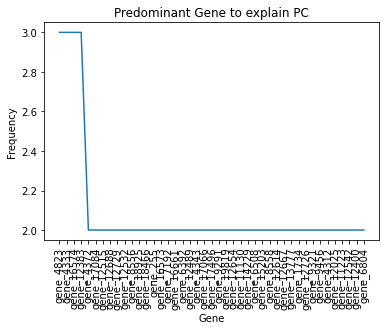

In [220]:
max_abs=pd.DataFrame(loadings_real.abs().idxmax())
max_abs_val_counts=pd.DataFrame(max_abs[0].value_counts())
plt.plot(max_abs_val_counts[max_abs_val_counts[0]>=2])
plt.xlabel('Gene')
plt.ylabel('Frequency')
plt.title('Predominant Gene to explain PC')
plt.xticks(rotation=90)
plt.show()

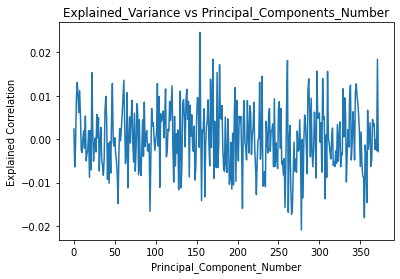

In [223]:
for i in range(1,2):
    plt.plot(loadings_real.loc['gene_'+str(i)])
    plt.xlabel('Principal_Component_Number')
    plt.ylabel('Explained Correlation')
    plt.title('Explained_Variance vs Principal_Components_Number')
    plt.show()

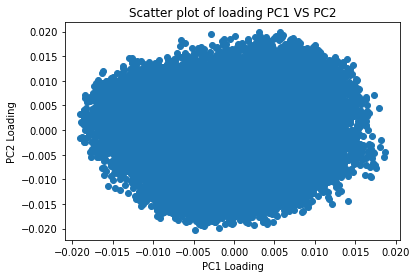

In [237]:
plt.scatter(loadings[0],loadings[1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Scatter plot of loading PC1 VS PC2')
plt.show()

# Performing K means Clustering on the above data from previous Assignment

In [185]:
import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    list_of_centroids = []
    for cluster in range(no_of_clusters):
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    centroid_df.index.name='Cluster_Assigned'
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    df_original_label_join=input_dataframe.join(df_clustered_label)
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    return new_centroids.T


def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    start_time=time.time()
    iteration=0
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        new_list_of_columns=df_new_centroids.columns.to_list()
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            df_cluster_label_copy=df_cluster_label.copy()
            df_cluster_label_copy.rename(columns={0:'Cluster_Assigned'},inplace=True)
            labels=df_cluster_label_copy['Cluster_Assigned'].to_list()
            silheoutte_score=silheoutte_score_Kmeans(input_dataframe,labels)
            chs_score=Calinski_Harbaz_score_Kmeans(input_dataframe,labels)
            end_time=time.time()
            return df_new_centroids,sum_of_square_error,silheoutte_score,chs_score,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    df_data_label=input_dataframe.join(df_cluster_label)
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)

def silheoutte_score_Kmeans(input_dataframe,labels):
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(input_dataframe, labels)
    return silhouette_avg

def Calinski_Harbaz_score_Kmeans(input_dataframe,labels):
    from sklearn.metrics import calinski_harabasz_score
    chs=calinski_harabasz_score(input_dataframe,labels)
    return chs


# K means output before PCA taken from Problem 3

In [228]:
error_values_before=pd.read_csv('K_means_Question_03_before_PCA.csv')
error_values_before.drop('Unnamed: 0',axis=1,inplace=True)


# Running k means on reduced Dataset after Applying PCA

In [187]:
principal_components_real_part=principal_components.copy()
principal_components_real_part=principal_components_real_part.applymap(lambda x:x.real)
error_values=[]
for no_of_experiments in range(1,21):
    final_centroids,sum_of_squared_error,sil_score,chs_score,run_time=kmeans_llyod(principal_components_real_part,5,10,100)
    error_values.append([5,no_of_experiments,sum_of_squared_error,sil_score,chs_score,run_time])
error_values_df_PCA= pd.DataFrame(error_values,columns=['No_of_Clusters', 'Iteration Number','Sum_of_squared_Errors','Silheoutte_Score','Chs_score','run_time'])  


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.331932719050041


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.073477546062724


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.275538004291125


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.959449763169422


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.431195069291874


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.270095428648855


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.130537374242255


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.425047392128988


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.373045365017001


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.016454933821896


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.752687483035156


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.640850439368327


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.413690611249291


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.668521069873546


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.336357093148234


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.411247495500604


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.592642510985155


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.832742226460928


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.534314000299487


Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/373 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.473125068174849


In [188]:
error_values_df_PCA.to_csv('K_means_after_pca_90_percent.csv')

In [230]:
error_values_df_PCA.columns

Index(['No_of_Clusters', 'Iteration Number', 'Sum_of_squared_Errors',
       'Silheoutte_Score', 'Chs_score', 'run_time'],
      dtype='object')

# Plotting graphs

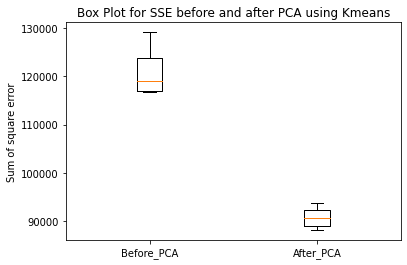

In [231]:
combined_df = pd.concat([error_values_before,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['Sum_of_squared_Errors'], combined_df.loc['After_PCA']['Sum_of_squared_Errors']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('Sum of square error')
plt.title('Box Plot for SSE before and after PCA using Kmeans')
plt.show()

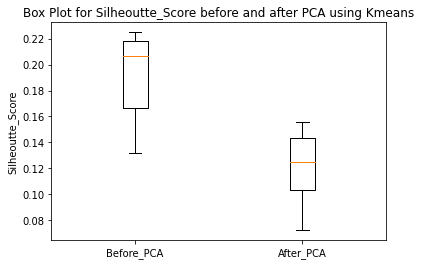

In [232]:
combined_df = pd.concat([error_values_before,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['Silheoutte_Score'], combined_df.loc['After_PCA']['Silheoutte_Score']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('Silheoutte_Score')
plt.title('Box Plot for Silheoutte_Score before and after PCA using Kmeans')
plt.show()

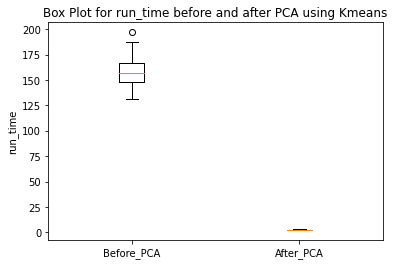

In [235]:
combined_df = pd.concat([error_values_before,error_values_df_PCA], keys=['Before_PCA','After_PCA'])
plt.boxplot([combined_df.loc['Before_PCA']['run_time'], combined_df.loc['After_PCA']['run_time']])
plt.xticks([1, 2], ['Before_PCA', 'After_PCA'])
plt.ylabel('run_time')
plt.title('Box Plot for run_time before and after PCA using Kmeans')
plt.show()

# End of Document